<a href="https://www.kaggle.com/code/joopaulopedrosomaus/ransomware-detection-xgboost?scriptVersionId=163231475" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ransomware-detection-data-set/data_file.csv


In [2]:

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

from time import perf_counter
import warnings
warnings.filterwarnings(action="ignore")

In [4]:
df = pd.read_csv("../input/ransomware-detection-data-set/data_file.csv", on_bad_lines="skip")
df

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62480,VirusShare_a43ceb5e5fffc793e0205d15a0606cb0,a43ceb5e5fffc793e0205d15a0606cb0,332,0,0,1,4,0,0,4096,6,0,3,1048576,0,23504,0,0
62481,VirusShare_0190dafc8304111a00fccf57340ea6a4,0190dafc8304111a00fccf57340ea6a4,332,0,0,7,10,0,0,0,7,0,7,1048576,0,15704,0,0
62482,VirusShare_0f3ca55979aaf59158d6b01140696e44,0f3ca55979aaf59158d6b01140696e44,332,0,0,0,4,0,0,404908,2,50,11,1048576,0,2364,0,0
62483,VirusShare_fca5ce35f1690db6babca5aa5d559535,fca5ce35f1690db6babca5aa5d559535,332,0,0,0,4,14448,70,4096,8,0,4,1048576,0,130296,0,0


In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [6]:
# Checking the shape of input and output features
print('Shape of the input features:', X.shape)
print('Shape of the output features:', y.shape)


Shape of the input features: (62485, 17)
Shape of the output features: (62485,)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Checking the shape of the training and test sets
print('Shape of the training input data:', X_train.shape)
print('Shape of the training output data:', y_train.shape)
print('Shape of the test input data:', X_test.shape)
print('Shape of the test output data:', y_test.shape)

Shape of the training input data: (56236, 17)
Shape of the training output data: (56236,)
Shape of the test input data: (6249, 17)
Shape of the test output data: (6249,)


In [8]:
X = df.iloc[:, 2:-1]
X

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses
0,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0
1,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0
2,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0
3,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0
4,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62480,332,0,0,1,4,0,0,4096,6,0,3,1048576,0,23504,0
62481,332,0,0,7,10,0,0,0,7,0,7,1048576,0,15704,0
62482,332,0,0,0,4,0,0,404908,2,50,11,1048576,0,2364,0
62483,332,0,0,0,4,14448,70,4096,8,0,4,1048576,0,130296,0


**Defining and training and xgboost model**

In [9]:
# evaluate xgboost algorithm for classification
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier


In [10]:
X = df.iloc[:, 2:-1].values
y = df.iloc[:,-1].values

In [11]:
type(X)

numpy.ndarray

In [12]:
X

array([[   332,      0,      0, ...,  34112,    672,      0],
       [ 34404,     84, 121728, ...,  16864,   1024,      0],
       [   332,      0,      0, ...,  34112,    672,      0],
       ...,
       [   332,      0,      0, ...,      0,   2364,      0],
       [   332,      0,      0, ...,      0, 130296,      0],
       [   332,      0,      0, ...,      0,   6912,      0]])

In [13]:
# from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


In [15]:
# define the model
model = XGBClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.997 (0.001)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# fit the model on the whole dataset
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [17]:
y_pred = model.predict(X_test)

In [18]:
preview = pd.DataFrame(data={
    'Predicted results': y_pred,
    'Actual results': y_test
})

preview

,Predicted results,Actual results
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
6244,1,1
6245,0,0
6246,0,0
6247,0,0


>10 0.993 (0.001)
>50 0.996 (0.001)
>100 0.997 (0.001)
>250 0.997 (0.001)


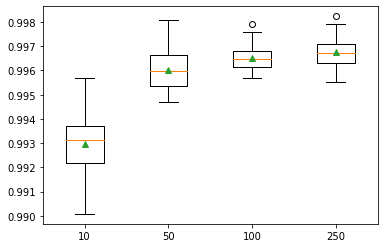

In [19]:
# X = df.iloc[:, 2:-1].values
# y = df.iloc[:,-1].values

# explore xgboost number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset(df):
    X = df.iloc[:, 2:-1].values
    y = df.iloc[:,-1].values
# 	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    trees = [10, 50, 100, 250]
    for n in trees:
        models[str(n)] = XGBClassifier(n_estimators=n)
    return models

# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
X, y = get_dataset(df)
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()
